In [1]:
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from mc.util import *
%aimport mc.util 

In [2]:
def to_rgba(hex, alpha):
    return ((hex >> 16) / 256, ((hex >> 8) & 0xFF) / 256, (hex & 0xFF) / 256, alpha)

colorAB = 0xfda58c
colorBA = 0x72d0ef
colorAB2 = 0xd1785e
colorBA2 = 0x4fa5c2

In [3]:
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha1', colors=[ to_rgba(colorBA, 0), to_rgba(colorBA, 0.9),])
matplotlib.colormaps.register(cmap=map_object)
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha2', colors=[ to_rgba(colorAB, 0), to_rgba(colorAB, 0.9),])
matplotlib.colormaps.register(cmap=map_object)

TypeError: draw_hexalattice() missing 1 required positional argument: 'ax'

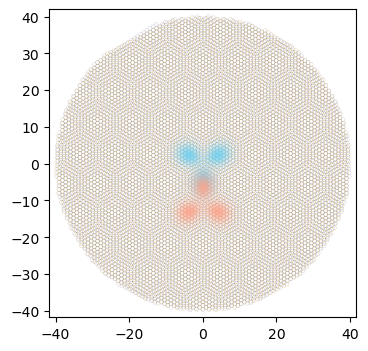

In [4]:
inverse_lattice = 6/180 * np.pi

fig, ax = plt.subplots(1, 1, figsize=[4, 4])

grid1, _ = create_hex_grid(
    nx=100,
    ny=100,
    rotate_deg=-33,
    min_diam=1,
)

grid2, _ = create_hex_grid(
    nx=100,
    ny=100,
    min_diam=1,
    rotate_deg=-27,
)

neworigin = 1 / inverse_lattice / np.sqrt(3)
latticeconstant = 1 / inverse_lattice / np.sqrt(3)

rad = ((grid1[:, 0])**2 + (grid1[:, 1] - neworigin)**2)**0.5
grid1 = grid1[rad.flatten() <= 40, :]
rad = ((grid2[:, 0])**2 + (grid2[:, 1] - neworigin)**2)**0.5
grid2 = grid2[rad.flatten() <= 40, :]

plot_single_lattice(grid1[:, 0], grid1[:, 1] - neworigin, face_color=None, edge_color=(150/255,147/255,181/255, 0.6), min_diam=1, plotting_gap=0, rotate_deg=-33, h_ax=ax)
plot_single_lattice(grid2[:, 0], grid2[:, 1] - neworigin, face_color=None, edge_color=(179/255,143/255,68/255, 0.6), min_diam=1, plotting_gap=0, rotate_deg=-27, h_ax=ax)

X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
R = 2
Z = np.exp(-(Y-R)**2 - X**2) + \
    np.exp(-(Y+R/2)**2 - (X+R*np.sqrt(3)/2)**2) + \
    np.exp(-(Y+R/2)**2 - (X-R*np.sqrt(3)/2)**2)
Z = Z / (X ** 2 + Y ** 2 + 0.7)

extent = 15

ax.imshow(Z, cmap='rainbow_alpha1', extent=(-extent, extent, -extent, extent), zorder=1)

ax.imshow(Z, cmap='rainbow_alpha2', extent=(-extent, +extent,
                                           -2*latticeconstant + extent, -2*latticeconstant-extent), zorder=1)

def draw_hexalattice(ax):
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(-7, 7, 1):
        for x in range(13 - abs(y)):
            Hexa.append((latticeconstant * np.sqrt(3) * (x - 1/2 - 3) + latticeconstant * np.sqrt(3) / 2 * abs(y),
                         latticeconstant *  np.sqrt(3) * y * np.sqrt(3) / 2 + latticeconstant / 2))
            if x != 0:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (13 - abs(y) + 1)))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (13 - abs(y) + 2)))
            if y < 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (13 - abs(y))))
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (13 - abs(y) - 1)))

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color='#555555', lw=1, zorder=0.5))
    
R = latticeconstant
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    for x in range(-10, 10):
        for y in range(-10, 10):
            xy = trilatloc((x, y), "down")
            xy = (xy[0], xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=0.5, lw=1, fill=False, edgecolor='#555555', ls=(0, (1, 1))))
    
draw_hexalattice()
draw_duallattice()

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])

ax.text(0, 0, "BA", horizontalalignment="center", verticalalignment="center", fontsize=20)
ax.text(0, -2*latticeconstant, "AB", horizontalalignment="center", verticalalignment="center", fontsize=20)
ax.text(latticeconstant/2*np.sqrt(3), latticeconstant/2, "AA", horizontalalignment="center", verticalalignment="center", fontsize=20)


def adddowntri(xy, color, edgecolor, name):
    xy = (
        xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=np.pi, facecolor=color,
        edgecolor=edgecolor, linewidth=4
        )
    
    ax.text(xy[0], xy[1] - latticeconstant * 0, name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=4)

    ax.add_patch(polygon)
    
def adduptri(xy, color, edgecolor, name, ls=None):
    xy = (
        (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=0, facecolor=color,
        edgecolor=edgecolor, linewidth=4,
        ls=ls
        )
    
    ax.text(xy[0], xy[1], name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)

adddowntri((0, 0), to_rgba(colorBA, 0.6), to_rgba(colorBA2, 1), "")
adduptri((0, -1), to_rgba(colorAB, 0.6), to_rgba(colorAB2, 1), "", ls="--")

adduptri((-2, 0), to_rgba(colorBA2, 0.6), to_rgba(colorBA2, 1), "")
adduptri((-1, 2), to_rgba(colorBA2, 0.6), to_rgba(colorBA2, 1), "")
adddowntri((-2, 2), to_rgba(colorBA2, 0.6), to_rgba(colorBA2, 1), "")
adduptri((1, 0), to_rgba(colorBA2, 0.6), to_rgba(colorBA2, 1), "")
adddowntri((0, -2), to_rgba(colorBA2, 0.6), to_rgba(colorBA2, 1), "")
adddowntri((2, -2), to_rgba(colorBA2, 0.6), to_rgba(colorBA2, 1), "")

ax.axis('off')

plt.tight_layout()
plt.savefig("figures/wannier.png", dpi=100)

6


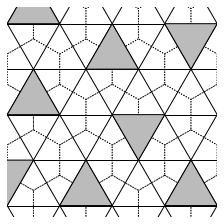

In [ ]:
# Fig 1a 
import mc.util as util

fig, ax = plt.subplots(1, 1, figsize=[3, 3], layout="constrained")
show_positions(ax, [(2, 4, 1), (4, 4, 0), (6, 4, 0), (4, 5, 1), (2, 6, 0), (3, 7, 0), (4, 7, 1), (1, 8, 0)], width=12, height=12, type="none", color="#BBB")
util.draw_duallattice(ax, 9, 9, ls=":")

ax.set_xlim([5, 9])
ax.set_ylim([3.25, 7.25])

plt.savefig("figures/mono.png")

2


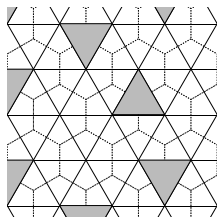

In [ ]:
# Fig 1a 
import mc.util as util

fig, ax = plt.subplots(1, 1, figsize=[3, 3], layout="constrained")
show_positions(ax, [(2, 4, 1), (1, 6, 1), (0, 8, 1), (2, 7, 1), (3, 8, 1), (4, 6, 0), (4, 3, 1), (5, 4, 1)], width=12, height=12, type="none", color="#BBB")
util.draw_duallattice(ax, 9, 9, ls=":")

ax.set_xlim([5, 9])
ax.set_ylim([3.25, 7.25])

plt.savefig("figures/mono.png")

4


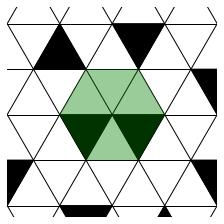

In [ ]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[3, 3], layout="constrained")
show_positions(ax, [(3, 5, 1), (4, 5, 1), (2, 7, 0), (3, 7, 1), (5, 6, 1), (2, 4, 1), (4, 3, 1), (6, 3, 0), (6, 4, 1)], width=12, height=12, type="none")

ax.set_xlim([5, 9])
ax.set_ylim([3.25, 7.25])

ax.add_patch(matplotlib.patches.RegularPolygon(mono_coords(4, 6), 6, orientation=np.pi/6, radius=1, fc="green", alpha=0.4, zorder=3))

plt.savefig("figures/cluster.png")

4


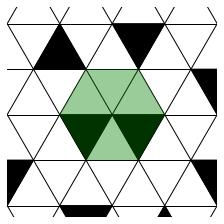

In [ ]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[3, 3], layout="constrained")
show_positions(ax, [(3, 5, 1), (4, 5, 1), (2, 7, 0), (3, 7, 1), (5, 6, 1), (2, 4, 1), (4, 3, 1), (6, 3, 0), (6, 4, 1)], width=12, height=12, type="none")

ax.set_xlim([5, 9])
ax.set_ylim([3.25, 7.25])

ax.add_patch(matplotlib.patches.RegularPolygon(mono_coords(4, 6), 6, orientation=np.pi/6, radius=1, fc="green", alpha=0.4, zorder=3))

plt.savefig("figures/cluster.png")

0
0


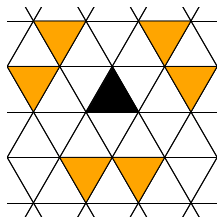

In [ ]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[3, 3], layout="constrained")
show_positions(ax, [(5, 3, 0)], length=12, type="none")
show_positions(ax, [(3, 3, 1), (3, 4, 1), (6, 3, 1), (5, 4, 1), (5, 1, 1), (6, 1, 1)], length=12, type="none", color="orange")

ax.set_xlim([5, 9])
ax.set_ylim([0.6, 4.6])

plt.savefig("figures/j4.png")

In [ ]:
# Fig 1d
import mc.pocket as pocket

positions = read_positions("new-data/6x6pos.dat", skip=0)

pos = positions[100]

fig, ax = plt.subplots(1, 1, figsize=[6, 4])

movedcolor = "#9CF"
movedcolor2 = "#074fb5"
show_positions(ax, pos, width=6, type="none", color=movedcolor)

pocket.width = 6
pocket.height = 6
sample = (pos, pocket.gen_occ(pos))
sample, moved = pocket.pocket_move(sample, seed=(2, 3, 1), sym=("R", (3, 3, 5)))

isect = list(set(sample[0]).intersection(set(pos)))

show_positions(ax, sample[0], width=6, height=6, type="none", color=movedcolor2, draw_triangular_lattice=False)
show_positions(ax, isect, width=6, height=6, type="none", color="#BBB", draw_triangular_lattice=False)

ax.set_xlim([-0.5, 9])
ax.set_ylim([-0.5, 6])

plt.savefig("figures/1a.png")

SyntaxError: invalid syntax (pocket.py, line 88)

NameError: name 'pos' is not defined

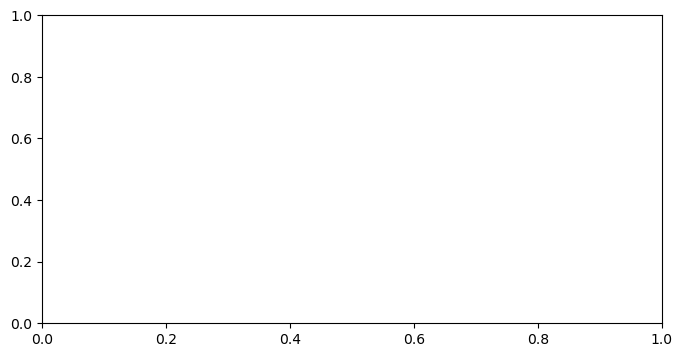

In [5]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[8, 4])

pos2, flipped = flip_line(pos, (5, 2), 6, 6, lim=2)
show_positions(ax, pos2, width=6, height=6, type="none", color="#BBB")
show_positions(ax, flipped, width=6, height=6, type="none", color=movedcolor2, draw_triangular_lattice=False)

show_positions(ax, list(set(pos) - set(pos2)), width=6, height=6, type="none", color=movedcolor, draw_triangular_lattice=False)

ax.set_xlim([-0.5, 9])
ax.set_ylim([-0.5, 6])

plt.savefig("figures/1a.png")

NameError: name 'pos' is not defined

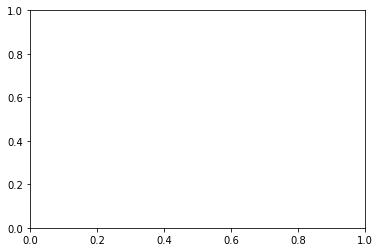

In [15]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[6, 4])

pos2, flipped = flip_line(pos, (3, 3), 6, 6, lim=10)
show_positions(ax, pos2, width=6, height=6, type="none", color="#BBB")
show_positions(ax, flipped, width=6, height=6, type="none", color=movedcolor2, draw_triangular_lattice=False)

show_positions(ax, list(set(pos) - set(pos2)), width=6, height=6, type="none", color=movedcolor, draw_triangular_lattice=False)

ax.set_xlim([-0.5, 9])
ax.set_ylim([-0.5, 6])

plt.savefig("figures/1a.png")

5


NameError: name 'util' is not defined

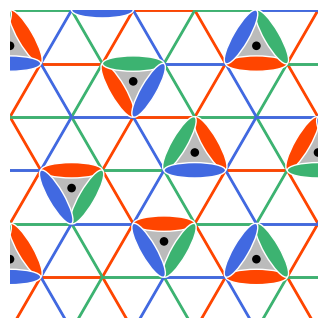

In [6]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[4, 4])

cfg = 0
# cfg = 1
draw_dimers = True
draw_hex_lattice = True
# color_bonds = ["orangered"]
color_bonds = ["orangered", "mediumseagreen", "royalblue"]
draw_vertices = False
draw_trimer_points = True

if cfg == 0:
    positions = [(2, 1, 0), (2, 2, 1), (2, 4, 1), (0, 5, 0), (1, 6, 0), (4, 5, 0), (4, 3, 0), (6, 3, 0), (4, 1, 1), (6, 1, 0)]
else:
    positions = [(3, 1, 0), (2, 3, 0), (2, 4, 1), (4, 3, 0), (4, 1, 1), (6, 1, 0)]

show_positions(ax, positions, height=12, width=12, type="none", color="#BBB")

if cfg == 0:
    ax.set_xlim([3, 8])
    ax.set_ylim([0.2, 5.2])
else:
    ax.set_xlim([3, 7])
    ax.set_ylim([0.2, 4.2])

import matplotlib
for color, pos in [("orangered", (3, 1)), ("mediumseagreen", (4, 1)), ("royalblue", (5, 1))]:
    lines = []
    points = []

    for dy in range(-1, 8):
        for dx in range(-9+dy, 6, 3):
            lines.append([mono_coords(pos[0]+dx, pos[1]+dy), mono_coords(pos[0]+dx+1, pos[1]+dy)])
            lines.append([mono_coords(pos[0]+dx, pos[1]+dy), mono_coords(pos[0]+dx-1, pos[1]+dy+1)])
            lines.append([mono_coords(pos[0]+dx, pos[1]+dy), mono_coords(pos[0]+dx, pos[1]+dy-1)])
            points.append(matplotlib.patches.Circle(mono_coords(pos[0]+dx-1, pos[1]+dy), radius=0.10))

    if color not in color_bonds:
        color = "black"

    if draw_vertices:
        ax.add_collection(matplotlib.collections.PatchCollection(points, zorder=8, fc=color))

    ax.add_collection(matplotlib.collections.LineCollection(lines, color=color, lw=2))

bonds = [[], [], []]
points = []
for x, y, s in positions:
    color = x + 2 * y + 0
    if s == 0:
        bonds[color%3].append(matplotlib.patches.Ellipse(mono_coords(x, y+0.5), width=1, height=0.25, angle=60))
        bonds[(color+1)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y), width=1, height=0.25, angle=0))
        bonds[(color+2)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y+0.5), width=1, height=0.25, angle=120))
    else:
        bonds[(color)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y+1), width=1, height=0.25, angle=0))
        bonds[(color+1)%3].append(matplotlib.patches.Ellipse(mono_coords(x+1, y+0.5), width=1, height=0.25, angle=60))
        bonds[(color+2)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y+0.5), width=1, height=0.25, angle=120))

    points.append(matplotlib.patches.Circle(trimer_coords(x, y, s), radius=0.07))
    
if draw_trimer_points:
    ax.add_collection(matplotlib.collections.PatchCollection(points, zorder=8, fc="black"))

if draw_dimers:
    ax.add_collection(matplotlib.collections.PatchCollection(bonds[0], fc="orangered", zorder=3, ec="white", lw=1))
    ax.add_collection(matplotlib.collections.PatchCollection(bonds[1], fc="mediumseagreen", zorder=3, ec="white", lw=1))
    ax.add_collection(matplotlib.collections.PatchCollection(bonds[2], fc="royalblue", zorder=3, ec="white", lw=1))

if draw_hex_lattice:
    util.draw_duallattice(ax, 9, 9, ls=":", zorder=5)

plt.savefig("figures/1a.png")

5


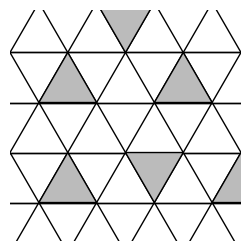

In [7]:
# Fig 1a 

fig, ax = plt.subplots(1, 1, figsize=[3, 3])

positions = [(3, 1, 0), (2, 3, 0), (2, 4, 1), (4, 3, 0), (4, 1, 1), (6, 1, 0)]

pos2, flipped = flip_line(positions, (3, 3), 6, 6, lim=10)
show_positions(ax, positions, width=12, height=12, type="none", color="#BBB")

colorfilter = None
# colorfilter = "orangered"
# colorfilter = "forestgreen"
# colorfilter = "royalblue"

import matplotlib
for color, pos in [("orangered", (3, 1)), ("forestgreen", (4, 1)), ("royalblue", (5, 1))]:
    if color != colorfilter: continue
    lines = []
    for dy in range(-1, 5):
        for dx in range(-6+dy, 5, 3):
            lines.append([mono_coords(pos[0]+dx, pos[1]+dy), mono_coords(pos[0]+dx+1, pos[1]+dy)])
            lines.append([mono_coords(pos[0]+dx, pos[1]+dy), mono_coords(pos[0]+dx-1, pos[1]+dy+1)])
            lines.append([mono_coords(pos[0]+dx, pos[1]+dy), mono_coords(pos[0]+dx, pos[1]+dy-1)])
    ax.add_collection(matplotlib.collections.LineCollection(lines, color=color, lw=4))

bonds = [[], [], []]
for x, y, s in positions:
    color = x + 2 * y + 0
    if s == 0:
        bonds[color%3].append(matplotlib.patches.Ellipse(mono_coords(x, y+0.5), width=1, height=0.25, angle=60))
        bonds[(color+1)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y), width=1, height=0.25, angle=0))
        bonds[(color+2)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y+0.5), width=1, height=0.25, angle=120))
    else:
        bonds[(color)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y+1), width=1, height=0.25, angle=0))
        bonds[(color+1)%3].append(matplotlib.patches.Ellipse(mono_coords(x+1, y+0.5), width=1, height=0.25, angle=60))
        bonds[(color+2)%3].append(matplotlib.patches.Ellipse(mono_coords(x+0.5, y+0.5), width=1, height=0.25, angle=120))

for color, bond in [("orangered", bonds[0]), ("forestgreen", bonds[1]), ("royalblue", bonds[2])]:
    if color != colorfilter:
        continue
    ax.add_collection(matplotlib.collections.PatchCollection(bond, fc=color, zorder=3))

import matplotlib.patheffects
for ls, color in [
    ([
        ("$0$", (4, 1)), ("$2$", (5, 2)), ("$1$", (3, 3)), ("$0$", (4, 4))],
    "royalblue"),
    ([
        ("$0$", (3, 1)), ("$0$", (6, 1)), ("$2$", (4, 2)), ("$1$", (2, 3)), ("$1$", (3, 4)), ("$1$", (5, 3))],
    "forestgreen"),
    ([
        ("$1$", (5, 1)), ("$0$", (3, 2)), ("$-2$", (2, 4)), ("$-1$", (4, 3))],
    "orangered"),
    ]:
    if color != colorfilter: continue
    for txt, pos in ls:
        pos = mono_coords(*pos)
        txt = plt.text(pos[0], pos[1], txt, size=24, color=color, horizontalalignment="center", verticalalignment="center", weight="bold")
        txt.set_path_effects([matplotlib.patheffects.withStroke(linewidth=2, foreground='w')])

ax.set_xlim([3, 7])
ax.set_ylim([0.2, 4.2])

plt.savefig("figures/1a.png", dpi=150)

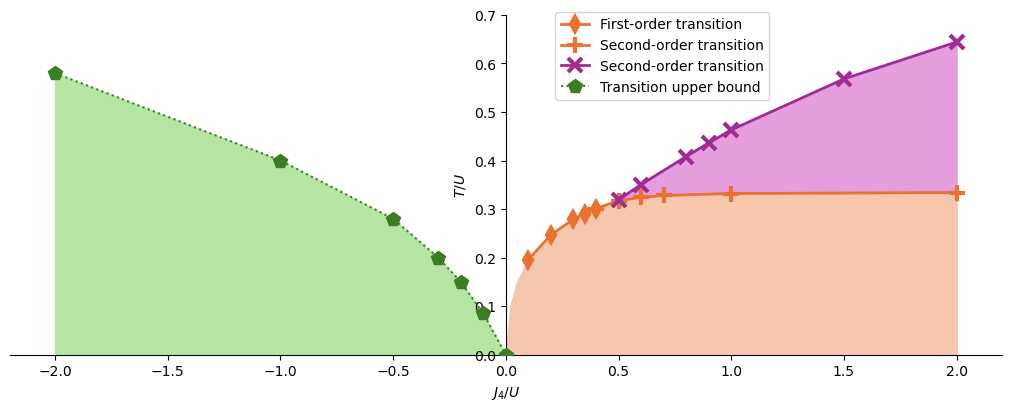

In [32]:
points = []
points.append((0.1, 0.196))
points.append((0.2, 0.247))
points.append((0.3, 0.279))
points.append((0.35, 0.2905))
points.append((0.4, 0.301))
# points.append((0.44, 0.3083))
# points.append((0.491, 0.3153))
points.append((0.5, 0.3173))
points.append((0.6, 0.324))
points.append((0.7, 0.328))
points.append((1, 0.332))
points.append((2, 0.334))
points = np.array(points)

points2 = []
# points2.append((0.4, 0.3013))
# points2.append((0.44, 0.3088))
# points2.append((0.491, 0.3177))
points2.append((0.5, 0.3192))
points2.append((0.6, 0.3505))
points2.append((0.8, 0.4082))
points2.append((0.9, 0.4362))
points2.append((1, 0.463))
points2.append((1.5, 0.568))
points2.append((2, 0.644))
points2 = np.array(points2)

fig, ax = plt.subplots(1, 1, figsize=[10, 4], layout="constrained")

color1 = "#E97132"
color2 = "#F6C6AD"
color3 = "#A02B93"
color4 = "#E59EDD"
color5 = "#3B7D23"
color6 = "#B4E5A2"

ax.set_xlim([-2.2, 2.2])
ax.set_ylim([0, 0.7])

# ax.scatter(points[:, 0], points[:, 1], marker="+", s=115, color=color1, linewidth=3, zorder=5)
ax.plot(points[:5, 0], points[:5, 1], color=color1, lw=2, ls="-", marker="d", markersize=7, markeredgewidth=3, label="First-order transition")
ax.plot(points[4:, 0], points[4:, 1], color=color1, lw=2, ls="-", marker="+", markersize=12, markeredgewidth=3, label="Second-order transition")

ax.fill_between(list(points[:, 0]), 0, list(points[:, 1]), color=color2)
ax.fill_between([0, 0.02, 0.05, points[0, 0]], 0, [0, 0.1, 0.15, points[0, 1]], color=color2)
# ax.plot([0, 0.02, 0.05, points[0, 0]], [0, 0.1, 0.15, points[0, 1]], color=color1, lw=2, ls="dashdot")
ax.plot(points2[:, 0], points2[:, 1], color=color3, lw=2, ls="-", markeredgewidth=3, marker="x", zorder=2, markersize=10, label="Second-order transition")

ax.fill_between(points2[:, 0], 0, points2[:, 1], zorder=0, color=color4)

js = [-2, -1, -0.5, -0.3, -0.2, -0.1, 0]
ys = [0.58, 0.4, 0.28, 0.2, 0.15, 0.085, 0]
# ax.scatter(js[:-1], ys[:-1], marker="p", s=100, color=color5, zorder=5)
ax.plot(js, ys, color=color5, ls=":", marker="p", zorder=5, markersize=10, label="Transition upper bound")
ax.fill_between(js, 0, ys, color=color6)

# ax.scatter([0.4274], [0.3066], marker="+", s=200, color="k", zorder=2)
# axins.scatter([0.4274], [0.3066], marker="+", s=200, color="k", zorder=2)

# axins.plot(points[:, 0], points[:, 1], marker="+")
# axins.plot(points2[:, 0], points2[:, 1], marker="x")
# axins.set_xlim([0.36, 0.54])
# axins.set_ylim([0.295, 0.325])
# ax.add_patch(matplotlib.patches.Rectangle((0.395, 0.295), 0.5-0.395, 0.325-0.295, fill=None, ec="k", lw=1, ls="--"))
ax.set_xlabel("$J_4/U$")
ax.set_ylabel("$T/U$")

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend(loc=(0.55, 0.75))

# axins.tick_params(axis='both', which='major', labelsize=8, pad=1)
plt.savefig("figures/pd.png", dpi=200, transparent=True)